In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed.
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_216.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_98.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_137.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_86_1.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_19_1.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_202.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_159.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_217.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_185_1.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lifters/shop_lifter_n_40_1.mp4
/kaggle/input/shoplifting-videos-dataset/Shop DataSet/non shop lif

In [4]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu1

In [5]:
from zipfile import ZipFile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

In [6]:
from torch.utils.data import Dataset, DataLoader
from glob import glob
from torch.utils.data import random_split
from torchvision.models import resnet18
import pandas as pd
import random
import shutil
from sklearn.model_selection import train_test_split

In [7]:
# Check what's inside the main input directory
print(os.listdir('/kaggle/input'))
print(os.listdir('/kaggle/input/shoplifting-videos-dataset'))
print(os.listdir('/kaggle/input/shoplifting-videos-dataset/Shop DataSet'))

['shoplifting-videos-dataset']
['Shop DataSet']
['non shop lifters', 'shop lifters']


In [8]:
dataset_path = '/kaggle/input/shoplifting-videos-dataset/Shop DataSet'
classes = ['shop lifters', 'non shop lifters']

# Count videos per class
for label in classes:
    class_path = os.path.join(dataset_path, label)
    videos = os.listdir(class_path)
    print(f"{label}: {len(videos)} videos")

shop lifters: 324 videos
non shop lifters: 531 videos


In [9]:
# check one video 
sample_video_path = os.path.join(dataset_path, 'shop lifters', os.listdir(os.path.join(dataset_path, 'shop lifters'))[0])
print("Sample video path:", sample_video_path)

cap = cv2.VideoCapture(sample_video_path)
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()

print("Total frames:", len(frames))
print("Frame shape:", frames[0].shape if frames else "No frames")


Sample video path: /kaggle/input/shoplifting-videos-dataset/Shop DataSet/shop lifters/shop_lifter_75.mp4
Total frames: 248
Frame shape: (576, 704, 3)


In [10]:
# Print First 10 Files in Each Class
for label in classes:
    print(f"\n📁 {label.upper()} - First 10 files with frame counts:")
    class_path = os.path.join(dataset_path, label)
    files = sorted(os.listdir(class_path))[:10]

    for filename in files:
        video_path = os.path.join(class_path, filename)
        cap = cv2.VideoCapture(video_path)

        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.release()

        print(f"  - {filename}: {total_frames} frames")


📁 SHOP LIFTERS - First 10 files with frame counts:
  - shop_lifter_0.mp4: 322 frames
  - shop_lifter_1.mp4: 223 frames
  - shop_lifter_10.mp4: 347 frames
  - shop_lifter_100.mp4: 350 frames
  - shop_lifter_101.mp4: 375 frames
  - shop_lifter_102.mp4: 475 frames
  - shop_lifter_103.mp4: 425 frames
  - shop_lifter_104.mp4: 350 frames
  - shop_lifter_105.mp4: 450 frames
  - shop_lifter_106.mp4: 375 frames

📁 NON SHOP LIFTERS - First 10 files with frame counts:
  - shop_lifter_n_0.mp4: 450 frames
  - shop_lifter_n_0_1.mp4: 450 frames
  - shop_lifter_n_1.mp4: 450 frames
  - shop_lifter_n_10.mp4: 475 frames
  - shop_lifter_n_100.mp4: 400 frames
  - shop_lifter_n_100_1.mp4: 400 frames
  - shop_lifter_n_101.mp4: 300 frames
  - shop_lifter_n_101_1.mp4: 300 frames
  - shop_lifter_n_102.mp4: 275 frames
  - shop_lifter_n_102_1.mp4: 275 frames


In [11]:
# Create list of all videos and labels
video_paths = []
labels = []

label_map = {
    "non shop lifters": 0,
    "shop lifters": 1
}

for class_name, label in label_map.items():
    class_dir = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".mp4"):
            video_paths.append(os.path.join(class_dir, filename))
            labels.append(label)

print(f"Found {len(video_paths)} videos")

Found 855 videos


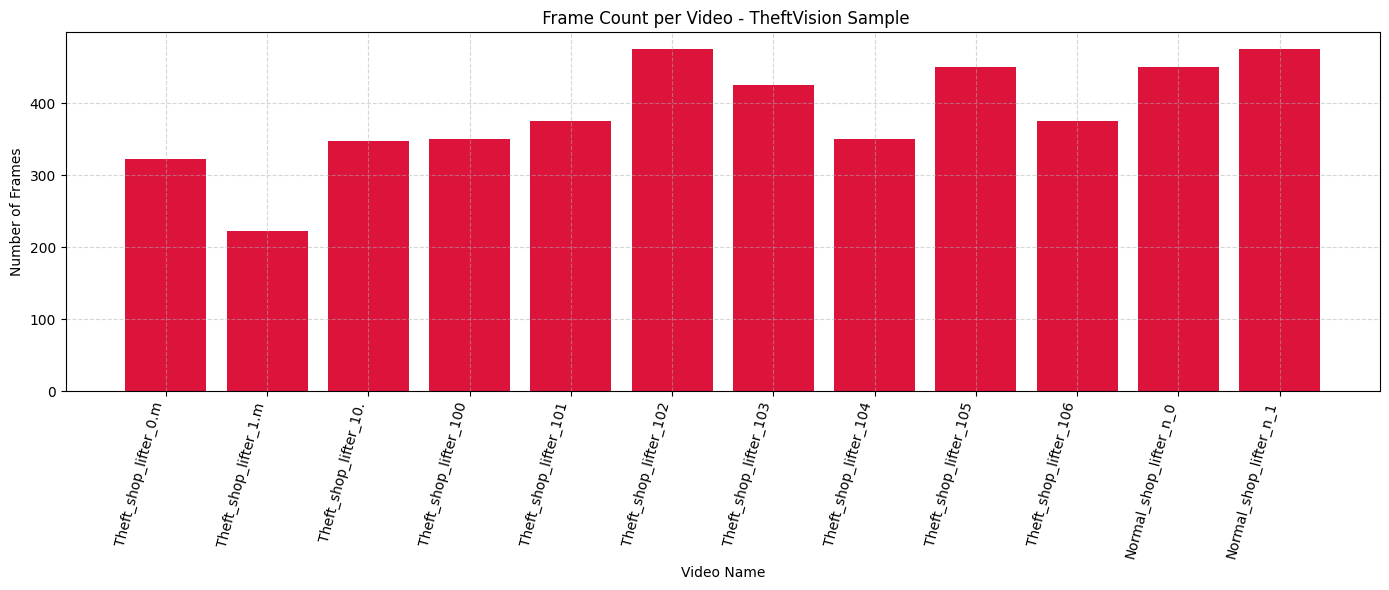

In [12]:
# Store results
video_names = []
frame_counts = []

# Loop through both categories
for label_folder in ["shop lifters", "non shop lifters"]:
    folder_path = os.path.join(dataset_path, label_folder)

    files = sorted(os.listdir(folder_path))[:10]  # Limit to first 10 for clarity

    for file in files:
        if file.endswith(".mp4"):
            video_path = os.path.join(folder_path, file)

            # Read video and get total frame count
            cap = cv2.VideoCapture(video_path)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            cap.release()

            # Clean label for plot
            label_short = "Theft" if label_folder == "shop lifters" else "Normal"
            name = f"{label_short}_{file[:15]}"  # Shorten for x-axis

            # Store results
            video_names.append(name)
            frame_counts.append(total_frames)

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(video_names, frame_counts, color='crimson')
plt.xticks(rotation=75, ha='right')
plt.xlabel("Video Name")
plt.ylabel("Number of Frames")
plt.title(" Frame Count per Video - TheftVision Sample")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [13]:
# Train/Val Split
train_videos, val_videos, train_labels, val_labels = train_test_split(
    video_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

In [14]:
video_root = "/kaggle/input/shoplifting-videos-dataset/Shop DataSet"
frame_output = "/kaggle/working/frames"

if os.path.exists(frame_output):
    shutil.rmtree(frame_output)
os.makedirs(frame_output, exist_ok=True)

categories = {
    "non shop lifters": 0,
    "shop lifters": 1
}

In [15]:
def extract_frames_from_video(video_path, save_dir, max_frames=5):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames - 1, max_frames, dtype=int)
    i = 0
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        success, frame = cap.read()
        if success:
            frame_name = f"{os.path.splitext(os.path.basename(video_path))[0]}_frame{i}.jpg"
            cv2.imwrite(os.path.join(save_dir, frame_name), frame)
            i += 1
    cap.release()

# Run frame extraction
for category in categories:
    folder = os.path.join(video_root, category)
    label = categories[category]
    label_path = os.path.join(frame_output, str(label))
    os.makedirs(label_path, exist_ok=True)
    
    for video_file in tqdm(os.listdir(folder), desc=f"Processing {category}"):
        video_path = os.path.join(folder, video_file)
        extract_frames_from_video(video_path, label_path)

Processing shop lifters: 100%|██████████| 324/324 [01:27<00:00,  3.70it/s]


In [16]:
class VideoFrameDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for label in os.listdir(root_dir):
            folder = os.path.join(root_dir, label)
            for frame in os.listdir(folder):
                self.samples.append((os.path.join(folder, frame), int(label)))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image, label

In [17]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = VideoFrameDataset(frame_output, transform=transform)
train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s] 


In [20]:
best_acc = 0.0

for epoch in range(5):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    print(f"Train Loss: {running_loss:.4f}, Acc: {train_acc:.2f}%")

    # Validation
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    print(f"Val Acc: {val_acc:.2f}%")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "/kaggle/working/best_model.pth")
        print("✅ Best model saved!")

Epoch 1: 100%|██████████| 214/214 [00:12<00:00, 17.56it/s]


Train Loss: 8.7127, Acc: 98.57%
Val Acc: 100.00%
✅ Best model saved!


Epoch 2: 100%|██████████| 214/214 [00:11<00:00, 18.60it/s]


Train Loss: 2.1853, Acc: 99.65%
Val Acc: 100.00%


Epoch 3: 100%|██████████| 214/214 [00:11<00:00, 18.69it/s]


Train Loss: 0.3042, Acc: 100.00%
Val Acc: 100.00%


Epoch 4: 100%|██████████| 214/214 [00:11<00:00, 18.29it/s]


Train Loss: 0.0464, Acc: 100.00%
Val Acc: 100.00%


Epoch 5: 100%|██████████| 214/214 [00:11<00:00, 18.07it/s]


Train Loss: 0.0220, Acc: 100.00%
Val Acc: 100.00%


In [25]:
torch.save(model.state_dict(), "theft_resnet_model.pth")